# 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv("./3.calculate_combin_pdpf.csv")

# 显示前几行数据以检查
data.head()

,FID,lon,lat,year,month,svid,soalr_radiation,north_angle,circle
0,0,116.511235,39.938578,2015,5,09002200001505070330393347E,4011.452691,178.503,5
1,1,116.511240,39.938127,2017,7,09002200121707031039191752I,4224.608547,175.866,5
2,2,116.511245,39.937677,2017,7,09002200121707031039410332I,3632.227471,178.830,5
3,3,116.511581,39.921441,2017,7,09002200121707031047200502I,4656.938507,164.138,5
4,4,116.511684,39.920998,2017,7,09002200121707031047345542I,4380.199119,174.047,5


# 根据circle筛选数据

## 5环-4环

In [3]:
circle_5 = data[data['circle'] == 5]
circle_5

,FID,lon,lat,year,month,svid,soalr_radiation,north_angle,circle
0,0,116.511235,39.938578,2015,5,09002200001505070330393347E,4011.452691,178.503,5
1,1,116.511240,39.938127,2017,7,09002200121707031039191752I,4224.608547,175.866,5
2,2,116.511245,39.937677,2017,7,09002200121707031039410332I,3632.227471,178.830,5
3,3,116.511581,39.921441,2017,7,09002200121707031047200502I,4656.938507,164.138,5
4,4,116.511684,39.920998,2017,7,09002200121707031047345542I,4380.199119,174.047,5
...,...,...,...,...,...,...,...,...,...
98904,157727,116.259906,39.957251,2017,6,09002200011706191212509318D,4773.160137,275.200,5
98905,157728,116.259543,39.957563,2017,6,09002200011706191213282918D,2572.078456,3.365,5
98906,157729,116.259064,39.957709,2017,6,09002200011706191213427918D,1999.441548,4.491,5
98907,157730,116.259863,39.957899,2017,6,09002200011706191213427918D,1999.440700,4.491,5


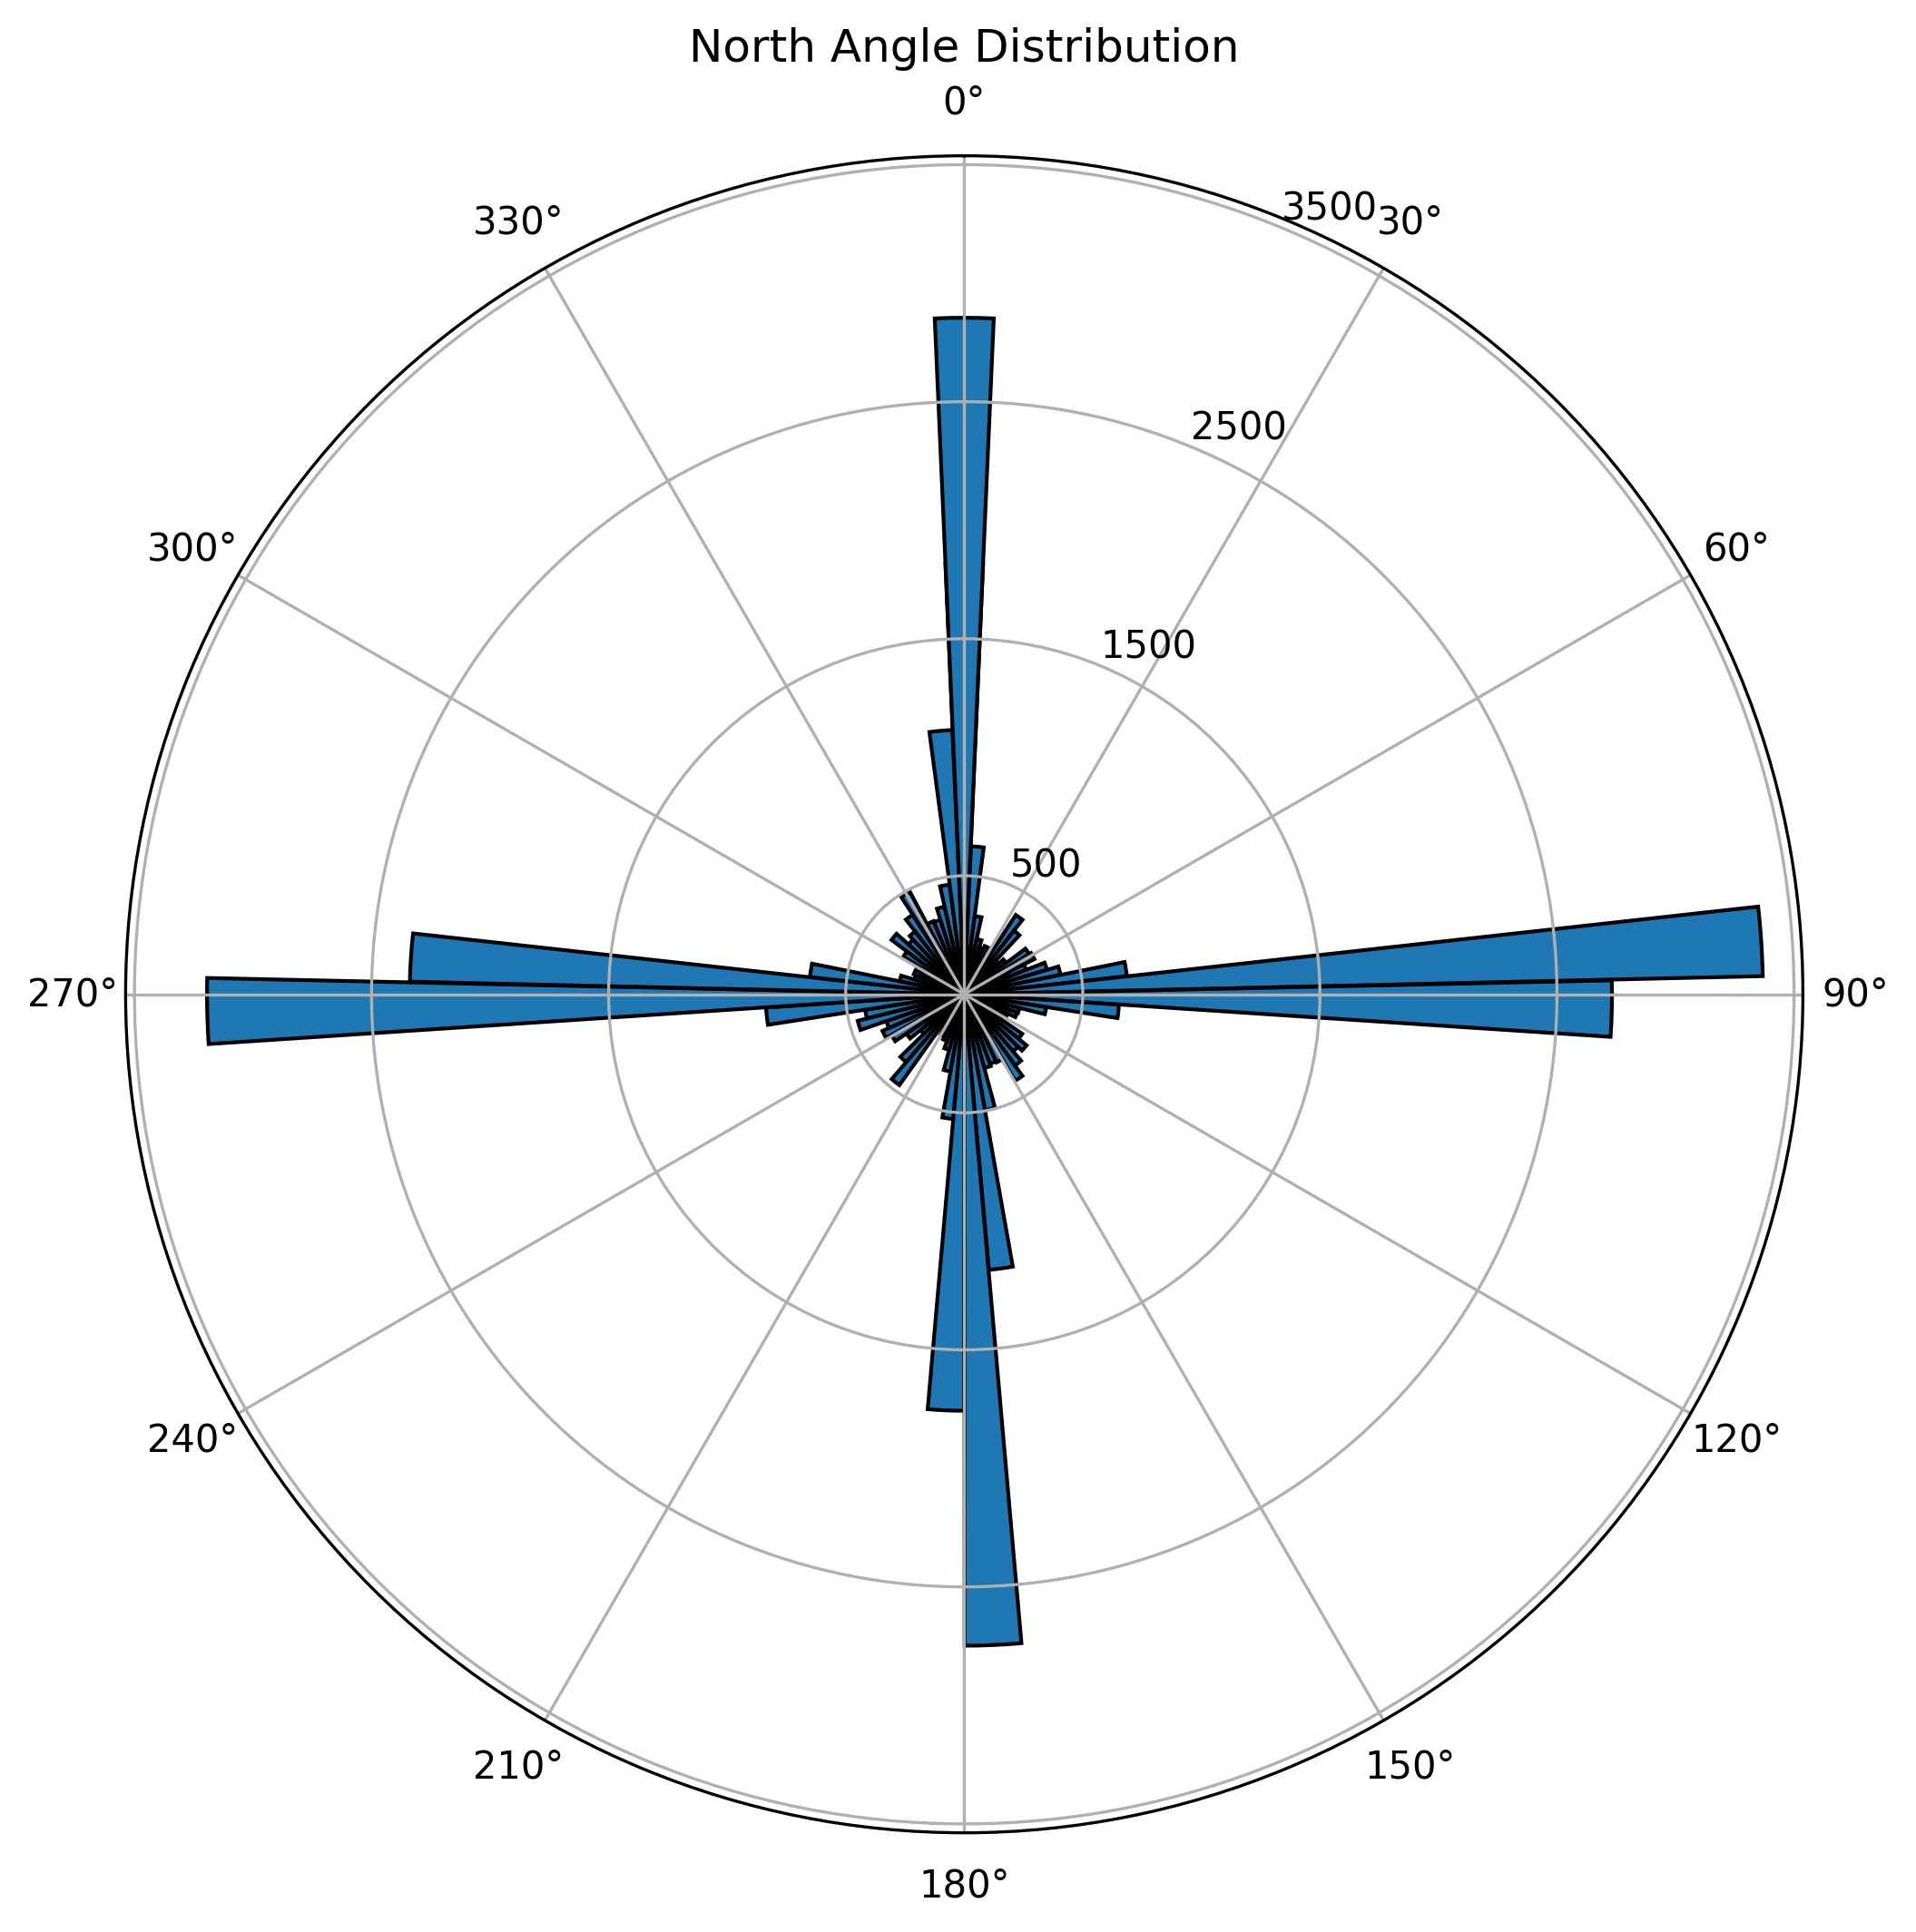

In [35]:
# 定义角度的区间
bins = np.arange(0, 365, 5)

# 计算频数
hist, _ = np.histogram(circle_5['north_angle'], bins=bins)

# 为圆形柱状图创建角度
theta = np.linspace(0.0, 2 * np.pi, len(hist))

# 更新角度标签，每30度为一个标签
xticks = np.arange(0, 2 * np.pi, np.pi/6)
xticklabels = ['{}°'.format(i*30) for i in range(12)]

# 绘制圆形柱状图
plt.figure(figsize=(8,8),dpi=300)
ax = plt.subplot(111, projection='polar')

# 旋转0度到正上方
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

bars = ax.bar(theta, hist, width=(2*np.pi) / len(hist), bottom=0.0,color='#1f77b4', edgecolor='black')

# 设置标题和标签
ax.set_title("North Angle Distribution")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
# 设置y轴的坐标
ax.set_yticks([500, 1500, 2500, 3500])
ax.yaxis.grid(True)

plt.show()

## 4环-3环

In [12]:
circle_4 = data[data['circle'] == 4]
circle_4

,FID,lon,lat,year,month,svid,soalr_radiation,north_angle,circle
4974,7337,116.483846,39.898307,2017,8,09002200121708201405514492Q,4824.942990,1.107,4
4975,7338,116.483845,39.898758,2017,8,09002200121708201406005232Q,4984.347048,1.245,4
4976,7339,116.483852,39.899208,2017,8,09002200121708201406081162Q,5262.660568,0.977,4
4977,7340,116.483840,39.893625,2017,8,09002200121708201403528942Q,4684.315511,1.261,4
4978,7341,116.483841,39.894075,2017,8,09002200121708201404003502Q,4731.500889,0.942,4
...,...,...,...,...,...,...,...,...,...
98833,157568,116.282594,39.969000,2017,6,09002200011706161513545348D,2569.699502,341.395,4
98860,157629,116.390448,39.843547,2015,5,0900220000150507085010273O5,3985.669148,174.936,4
98861,157630,116.390608,39.843309,2015,5,0900220000150507085016354O5,4153.606473,175.684,4
98862,157631,116.303433,39.919389,2017,7,09002200121707051611309759S,3497.405019,179.120,4


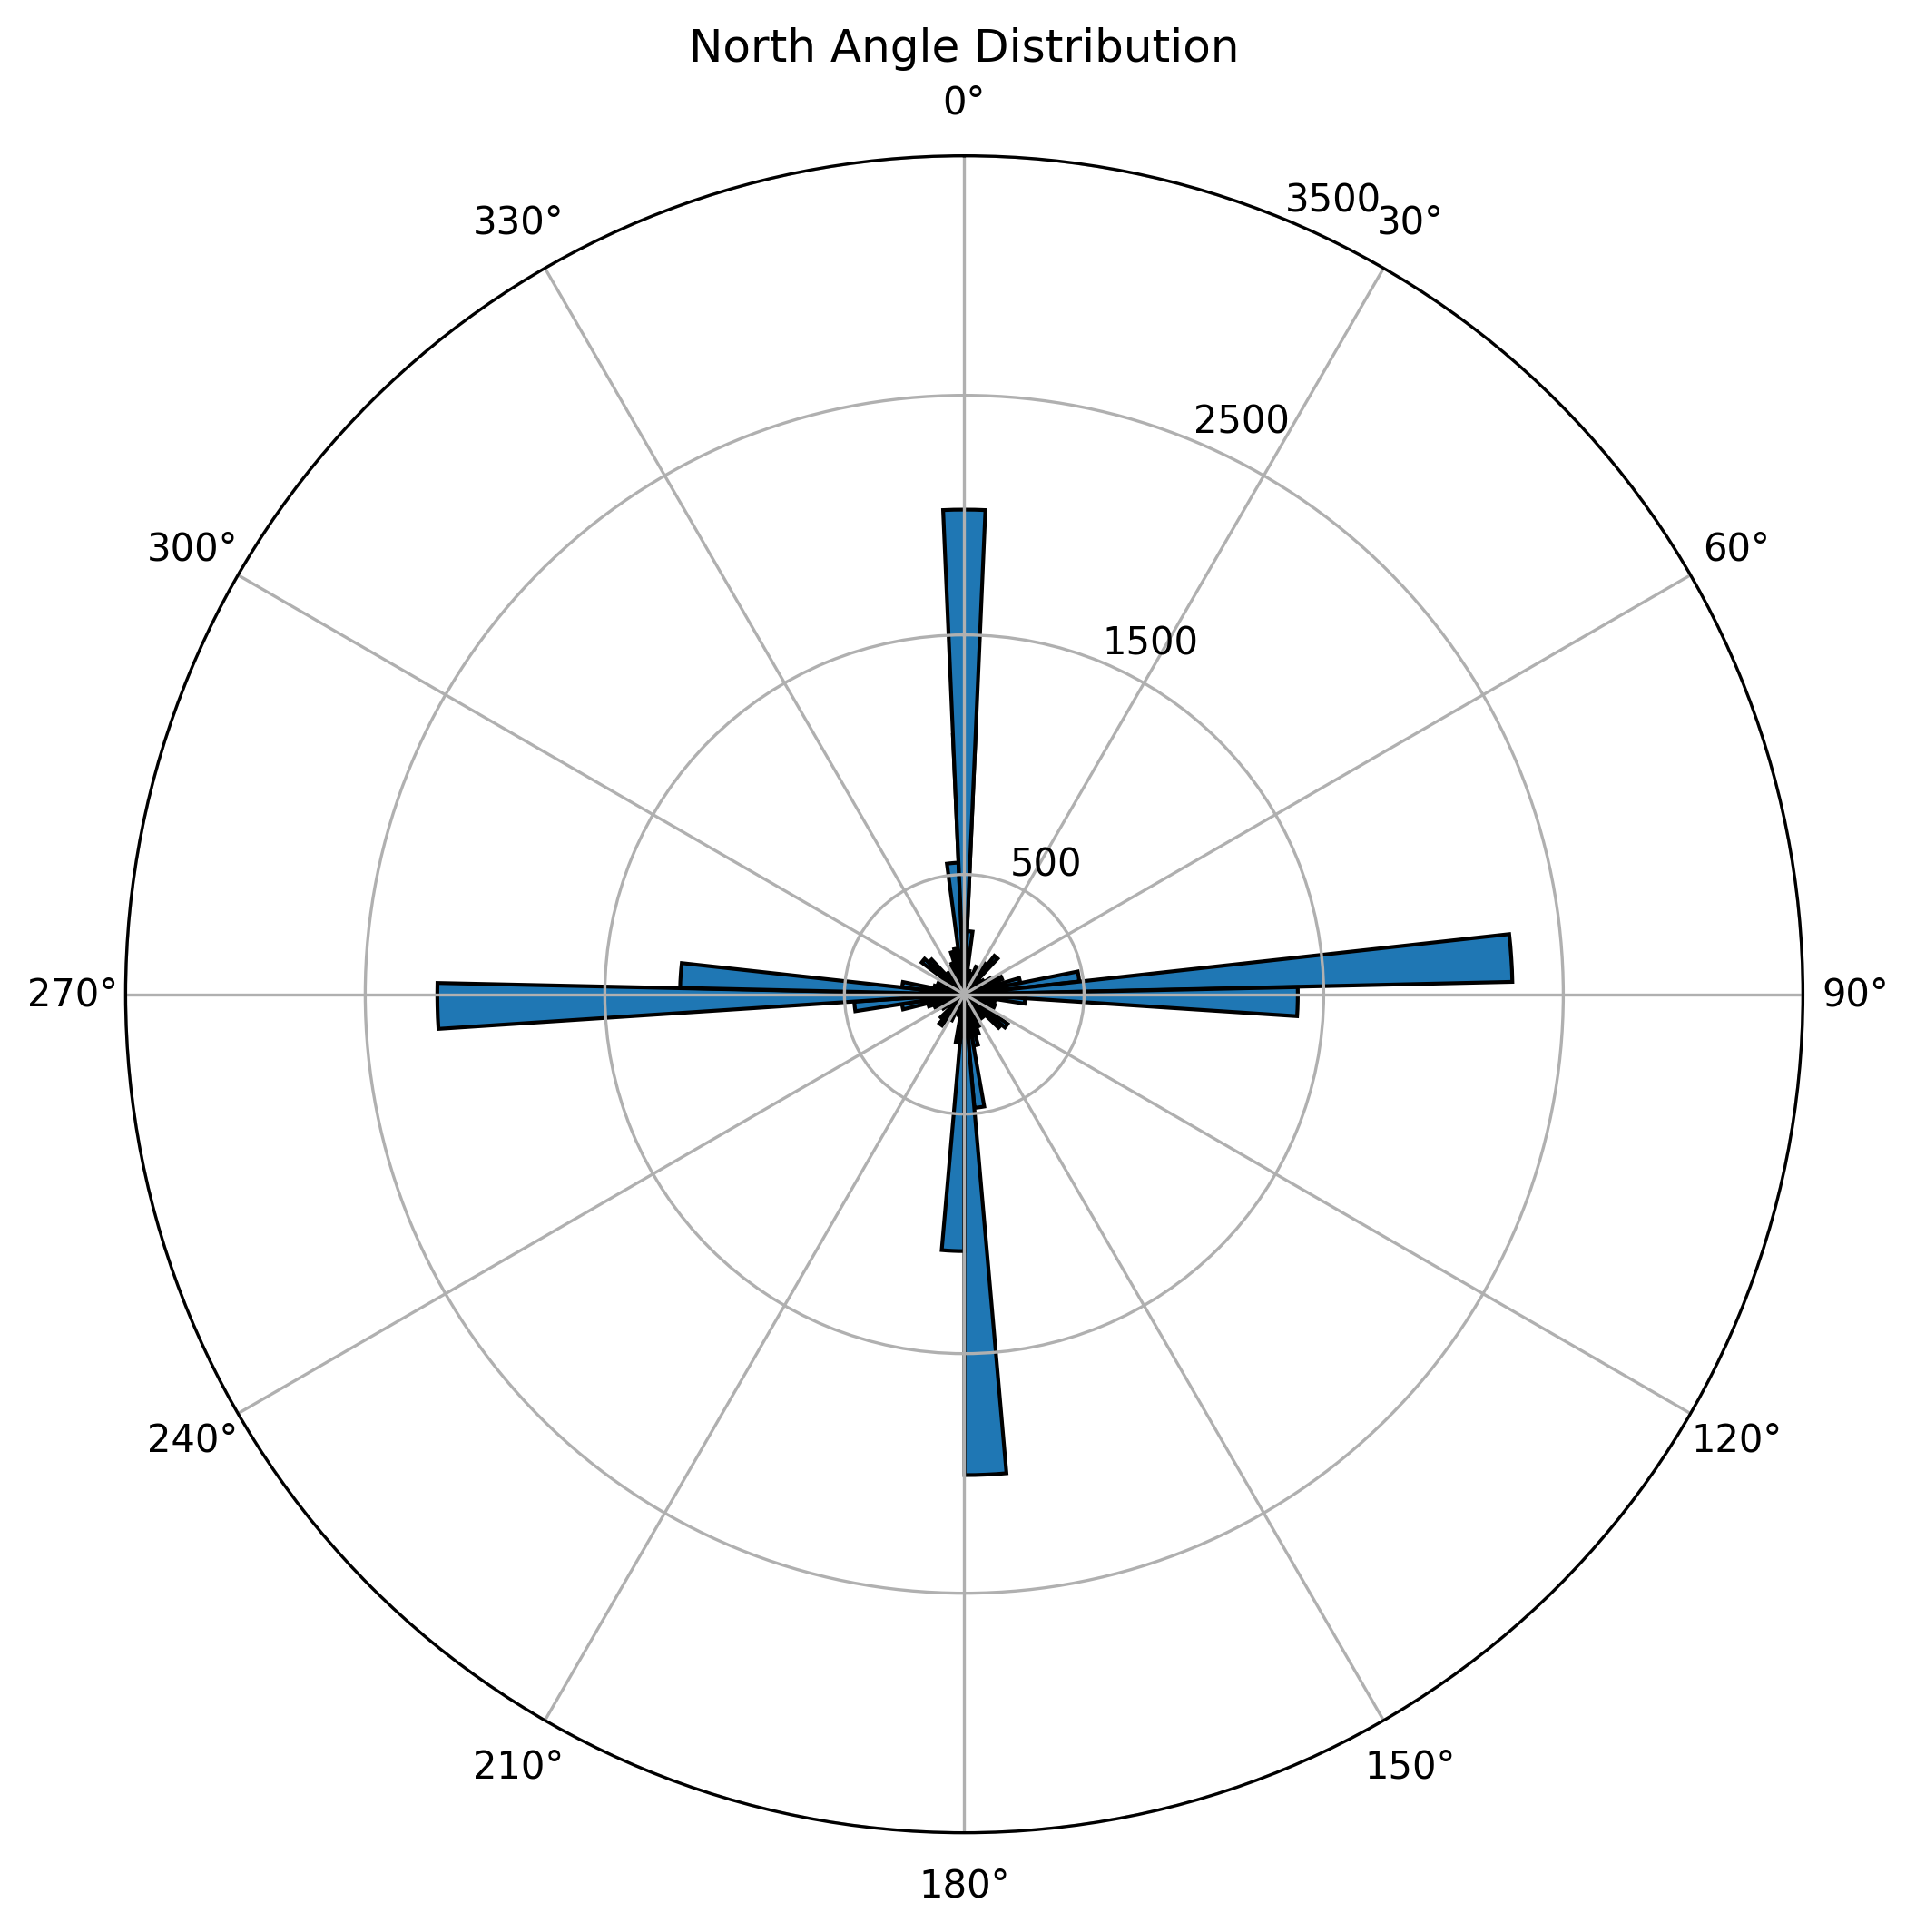

In [36]:
# 定义角度的区间
bins = np.arange(0, 365, 5)

# 计算频数
hist, _ = np.histogram(circle_4['north_angle'], bins=bins)

# 为圆形柱状图创建角度
theta = np.linspace(0.0, 2 * np.pi, len(hist))

# 更新角度标签，每30度为一个标签
xticks = np.arange(0, 2 * np.pi, np.pi/6)
xticklabels = ['{}°'.format(i*30) for i in range(12)]

# 绘制圆形柱状图
plt.figure(figsize=(8,8),dpi=300)
ax = plt.subplot(111, projection='polar')

# 旋转0度到正上方
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

bars = ax.bar(theta, hist, width=(2*np.pi) / len(hist), bottom=0.0,color='#1f77b4', edgecolor='black')

# 设置标题和标签
ax.set_title("North Angle Distribution")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
# 设置y轴的坐标
ax.set_yticks([500, 1500, 2500, 3500])
ax.yaxis.grid(True)

plt.show()

## 3环-2环

In [14]:
circle_3 = data[data['circle'] == 3]
circle_3

,FID,lon,lat,year,month,svid,soalr_radiation,north_angle,circle
6315,10054,116.319575,39.909689,2017,7,09002200121707051530354579S,817.830622,95.191,3
6316,10066,116.316193,39.909757,2015,5,09002200001505160715471882M,2250.160907,95.035,3
6317,10067,116.316778,39.909744,2017,7,09002200121707051521168199S,1160.839262,94.282,3
6318,10068,116.317363,39.909730,2017,7,09002200121707051521108899S,1106.716409,93.884,3
6319,10069,116.317948,39.909717,2015,5,09002200001505160716112462M,3627.432538,94.003,3
...,...,...,...,...,...,...,...,...,...
98638,157210,116.392600,39.869928,2017,6,09002200011706161105060572Q,2499.024968,87.495,3
98816,157489,116.410328,39.949011,2017,7,09002200121707121347257222M,4457.142021,5.314,3
98817,157490,116.410358,39.948561,2017,7,09002200121707121430022752M,4857.667233,355.869,3
98818,157491,116.308242,39.885806,2017,7,09002200121707301051151632Q,4313.833189,239.389,3


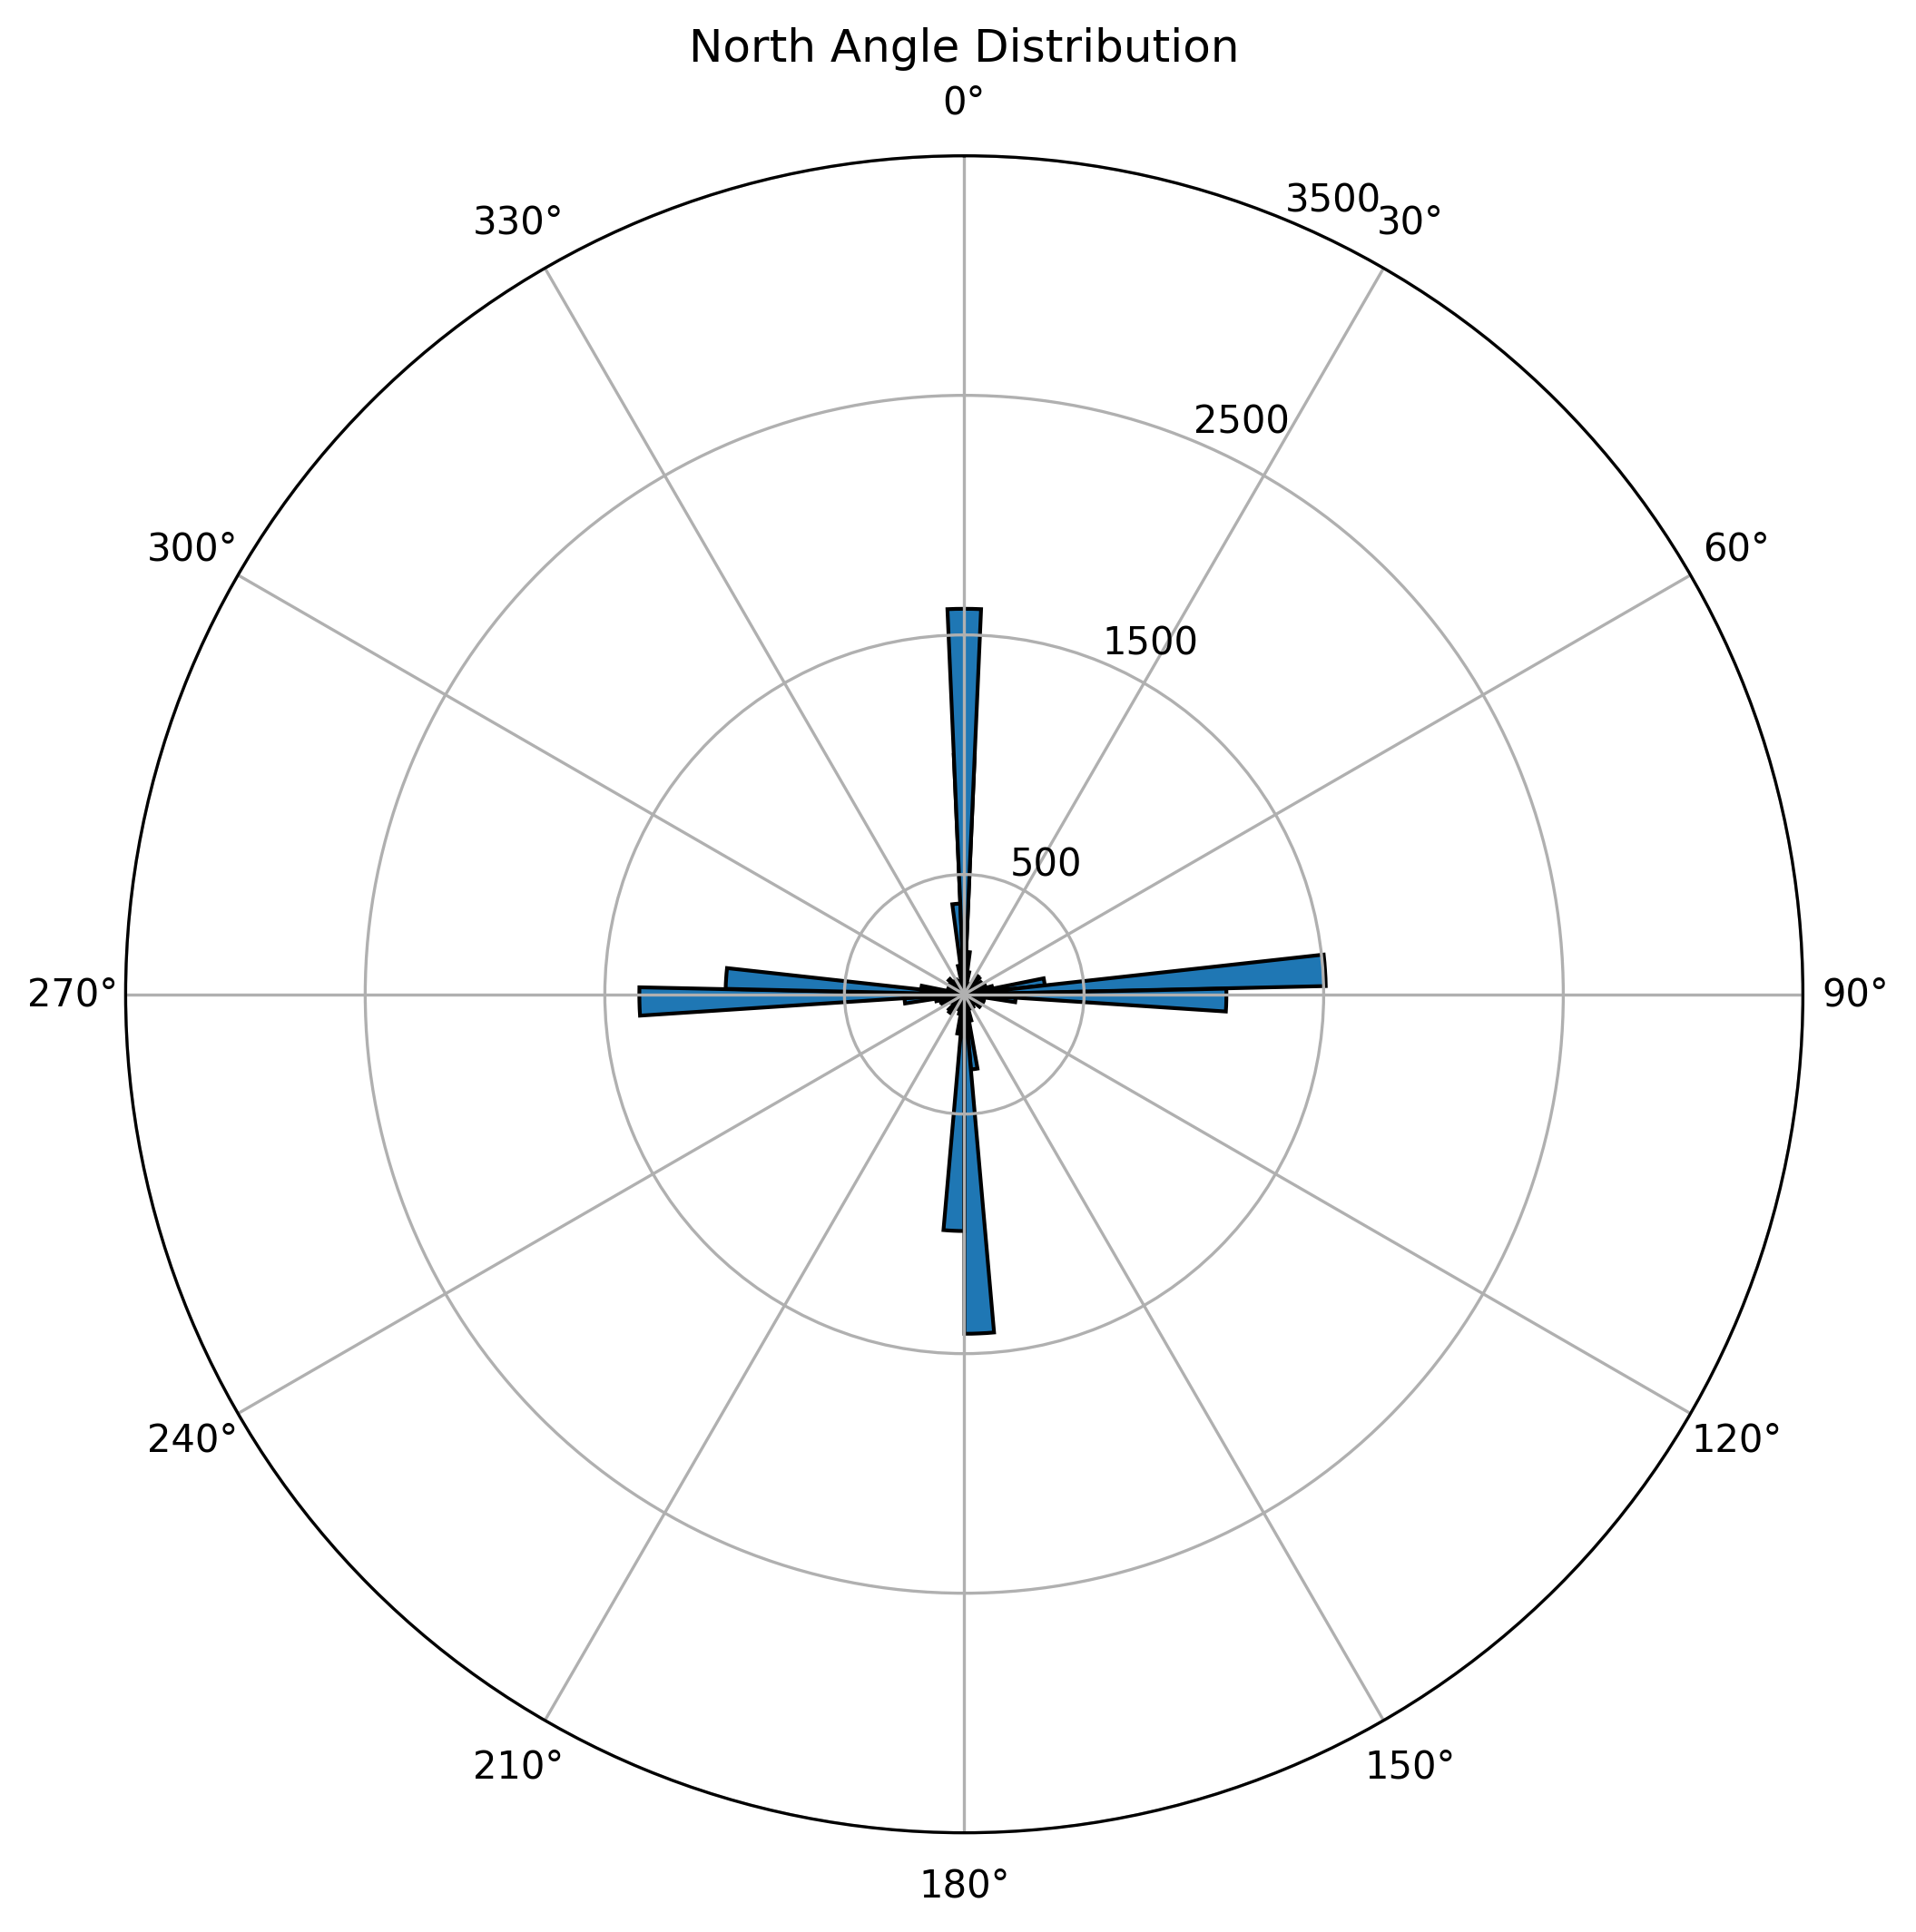

In [37]:
# 定义角度的区间
bins = np.arange(0, 365, 5)

# 计算频数
hist, _ = np.histogram(circle_3['north_angle'], bins=bins)

# 为圆形柱状图创建角度
theta = np.linspace(0.0, 2 * np.pi, len(hist))

# 更新角度标签，每30度为一个标签
xticks = np.arange(0, 2 * np.pi, np.pi/6)
xticklabels = ['{}°'.format(i*30) for i in range(12)]

# 绘制圆形柱状图
plt.figure(figsize=(8,8),dpi=300)
ax = plt.subplot(111, projection='polar')

# 旋转0度到正上方
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

bars = ax.bar(theta, hist, width=(2*np.pi) / len(hist), bottom=0.0,color='#1f77b4', edgecolor='black')

# 设置标题和标签
ax.set_title("North Angle Distribution")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
# 设置y轴的坐标
ax.set_yticks([500, 1500, 2500, 3500])
ax.yaxis.grid(True)

plt.show()

## 2环

In [7]:
circle_2 = data[data['circle'] == 2]
circle_2

,FID,lon,lat,year,month,svid,soalr_radiation,north_angle,circle
6208,9931,116.386208,39.898990,2015,5,0900220000150504042713140T5,4709.142502,267.763,2
6209,9932,116.388315,39.898892,2017,8,09002200121708151710218452Q,4975.427778,276.249,2
6210,9933,116.387734,39.898944,2017,6,09002200121706171309354542Q,4827.176511,276.363,2
6211,9934,116.387152,39.898988,2017,6,09002200121706171309422962Q,4795.710309,273.867,2
6212,9935,116.386055,39.899116,2017,6,09002200121706251216175862Q,3888.654973,267.783,2
...,...,...,...,...,...,...,...,...,...
98639,157212,116.392553,39.870828,2017,6,09002200011706161413098432Q,5096.265466,177.707,2
98640,157213,116.390635,39.871263,2015,9,09002200011509170738420255T,4685.435544,265.757,2
98641,157214,116.391218,39.871292,2015,9,09002200011509170738347165T,4656.417761,264.974,2
98642,157215,116.390949,39.871183,2015,9,09002200011509130615409955T,4937.792337,267.125,2


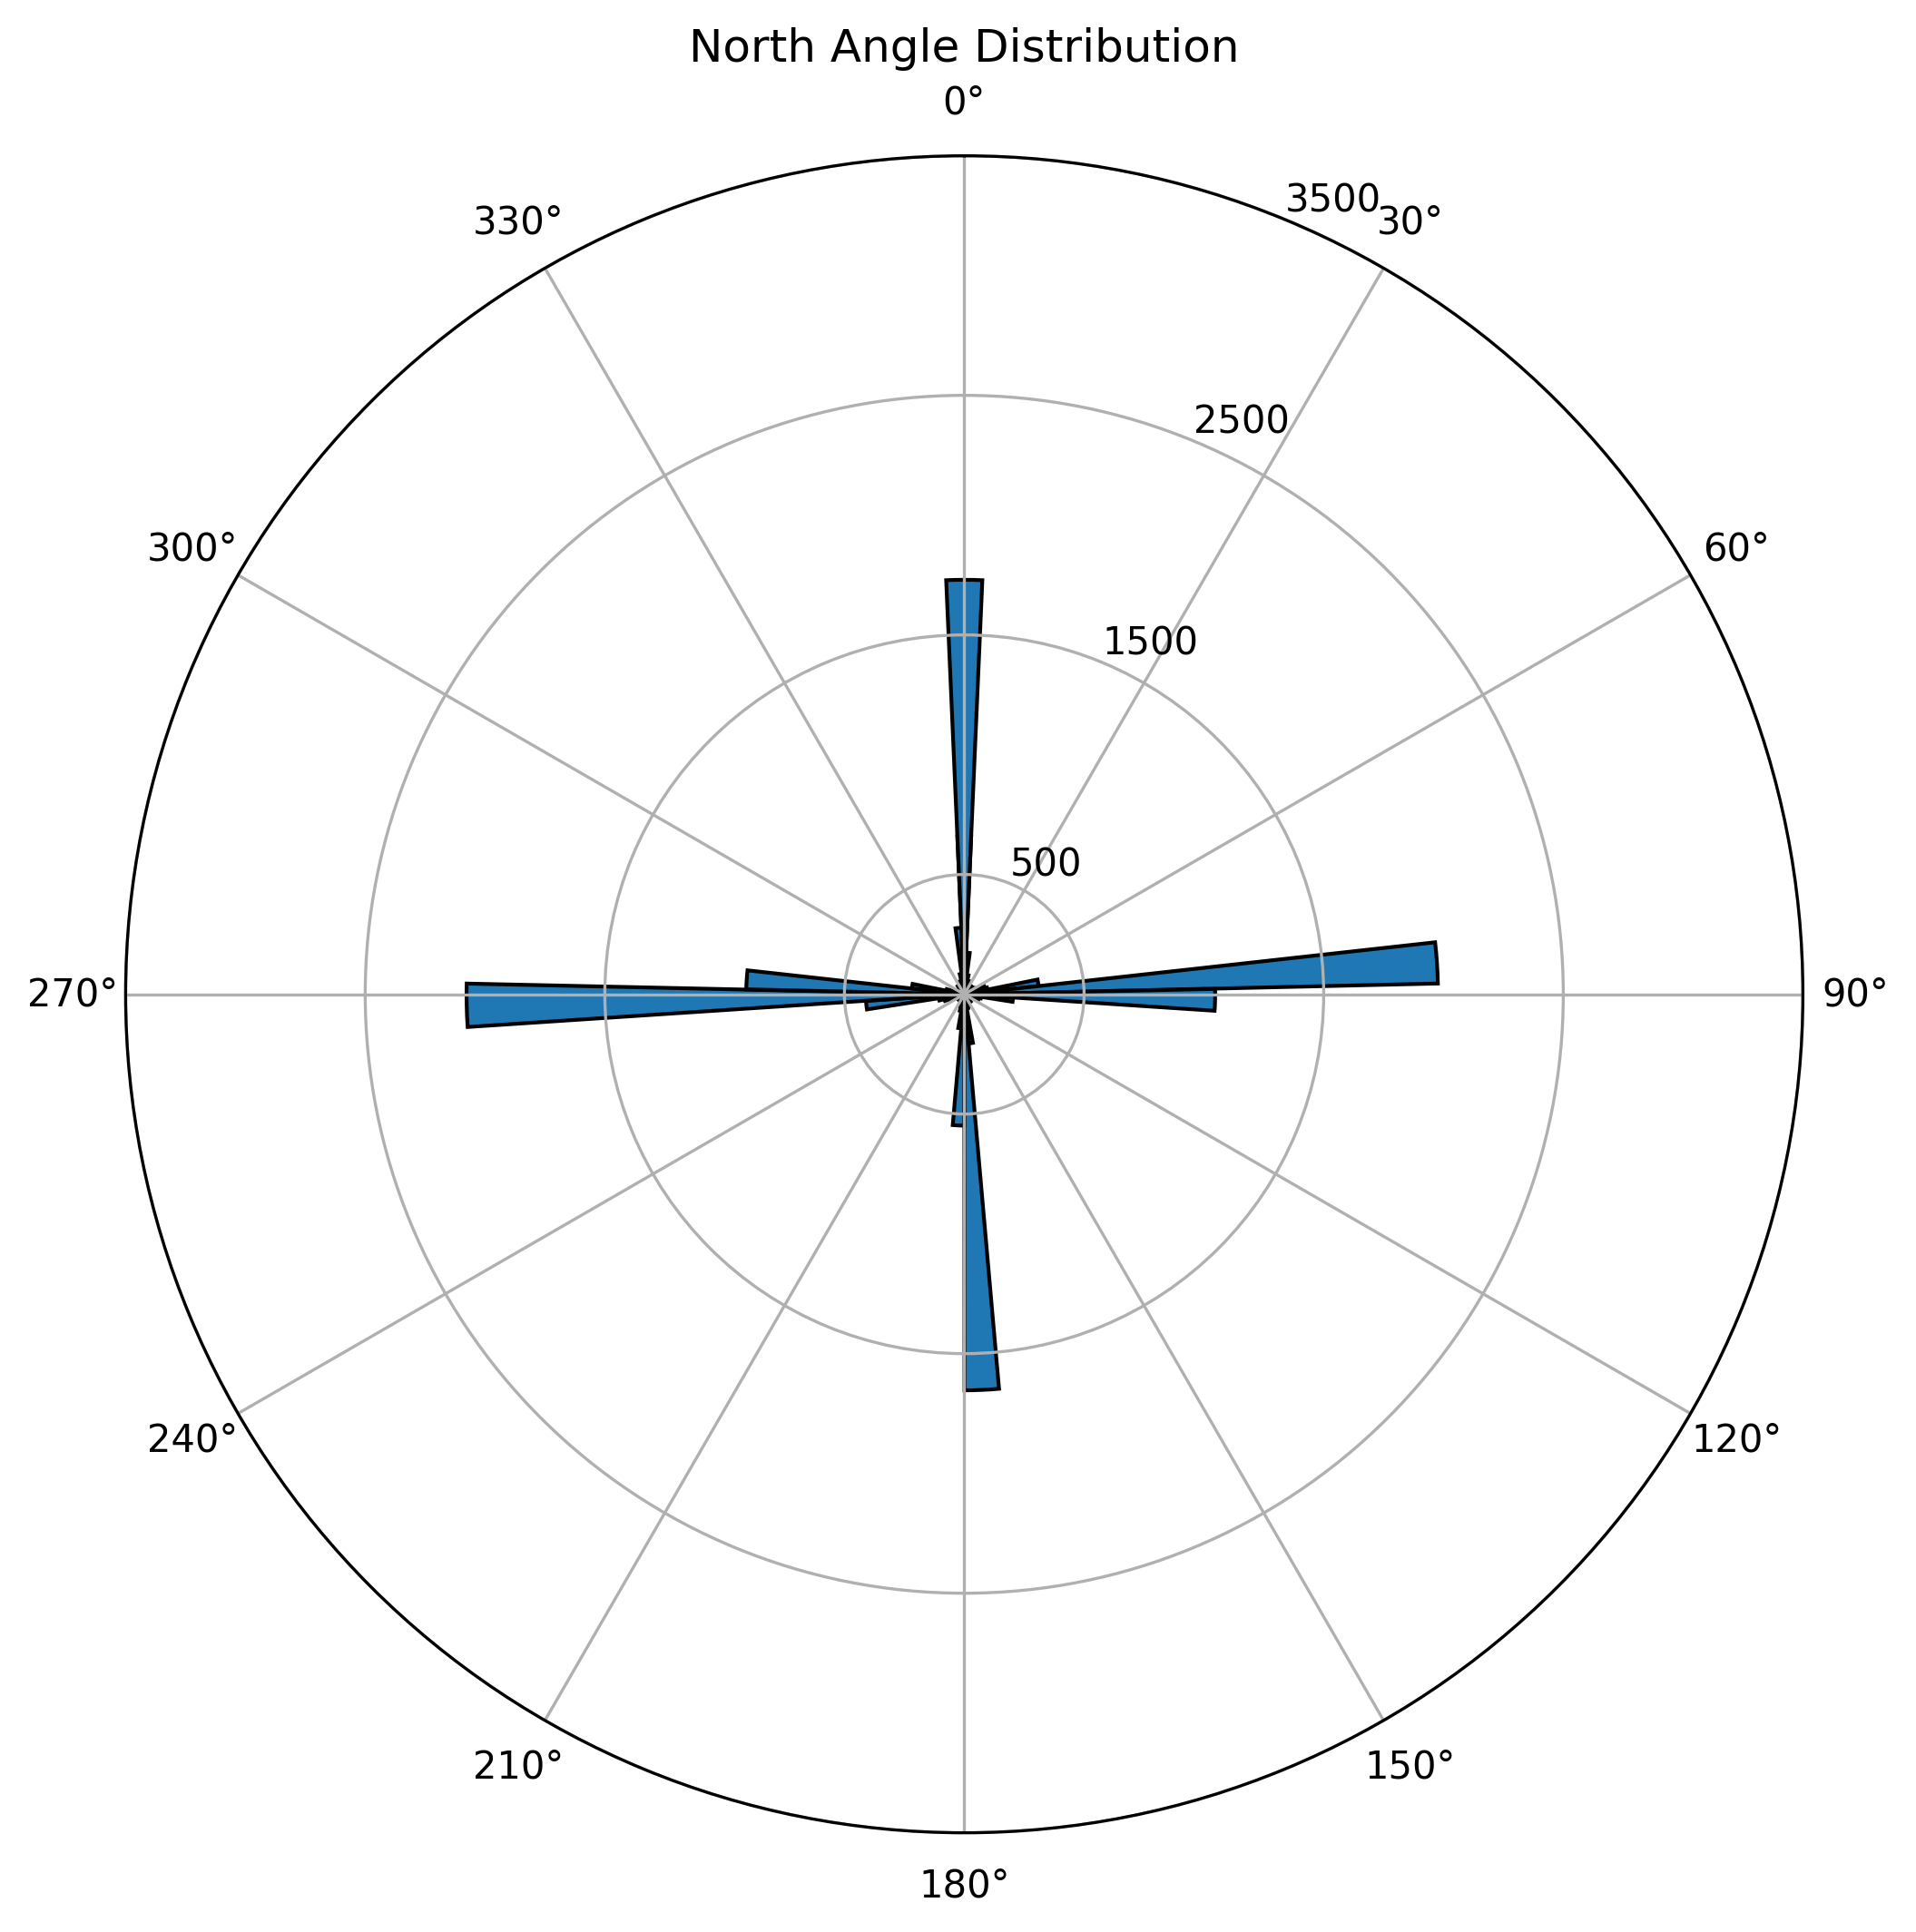

In [38]:
# 定义角度的区间
bins = np.arange(0, 365, 5)

# 计算频数
hist, _ = np.histogram(circle_2['north_angle'], bins=bins)

# 为圆形柱状图创建角度
theta = np.linspace(0.0, 2 * np.pi, len(hist))

# 更新角度标签，每30度为一个标签
xticks = np.arange(0, 2 * np.pi, np.pi/6)
xticklabels = ['{}°'.format(i*30) for i in range(12)]

# 绘制圆形柱状图
plt.figure(figsize=(8,8),dpi=300)
ax = plt.subplot(111, projection='polar')

# 旋转0度到正上方
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

bars = ax.bar(theta, hist, width=(2*np.pi) / len(hist), bottom=0.0,color='#1f77b4', edgecolor='black')

# 设置标题和标签
ax.set_title("North Angle Distribution")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
# 设置y轴的坐标
ax.set_yticks([500, 1500, 2500, 3500])
ax.yaxis.grid(True)

plt.show()

# 绘制每个环内的道路朝向统计

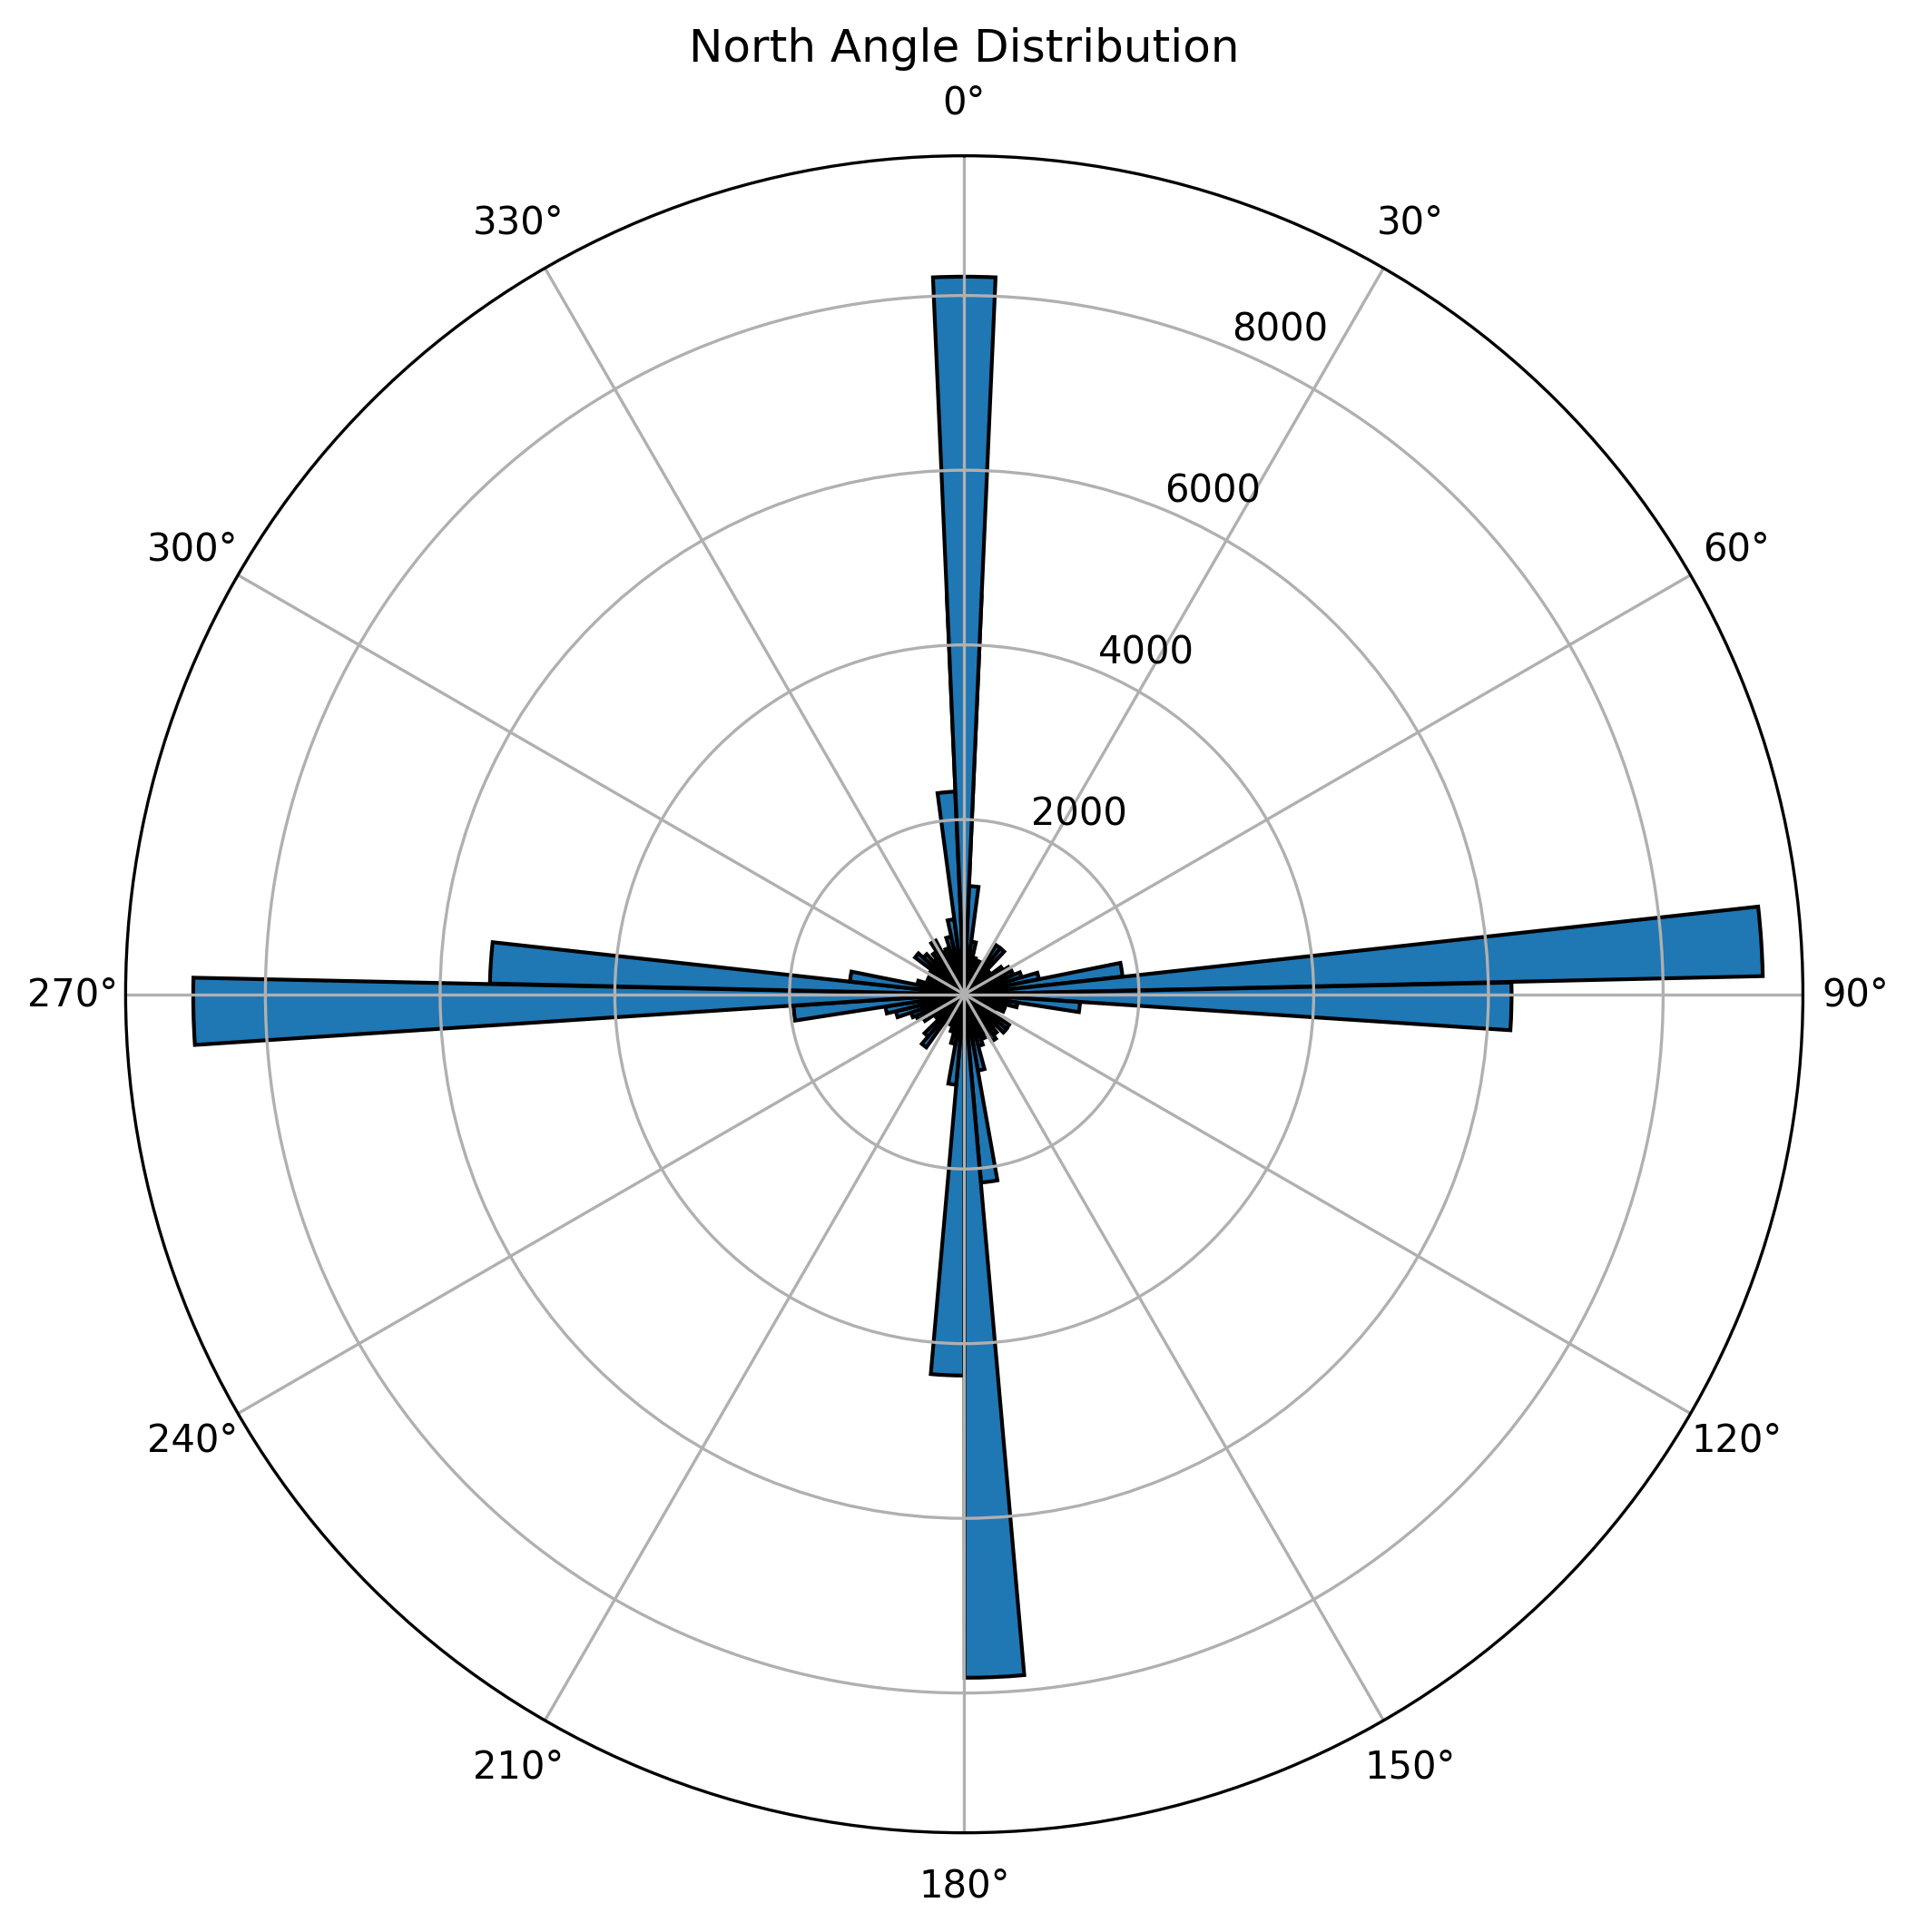

In [34]:
# 定义角度的区间
bins = np.arange(0, 365, 5)

# 计算频数
hist, _ = np.histogram(data['north_angle'], bins=bins)

# 为圆形柱状图创建角度
theta = np.linspace(0.0, 2 * np.pi, len(hist))

# 更新角度标签，每30度为一个标签
xticks = np.arange(0, 2 * np.pi, np.pi/6)
xticklabels = ['{}°'.format(i*30) for i in range(12)]

# 绘制圆形柱状图
plt.figure(figsize=(8,8),dpi=300)
ax = plt.subplot(111, projection='polar')

# 旋转0度到正上方
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

bars = ax.bar(theta, hist, width=(2*np.pi) / len(hist), bottom=0.0,color='#1f77b4', edgecolor='black')

# 设置标题和标签
ax.set_title("North Angle Distribution")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
# 设置y轴的坐标
# ax.set_yticks([2000, 4000, 6000, 8000])
ax.yaxis.grid(True)

plt.show()


# 绘制一个空的背景

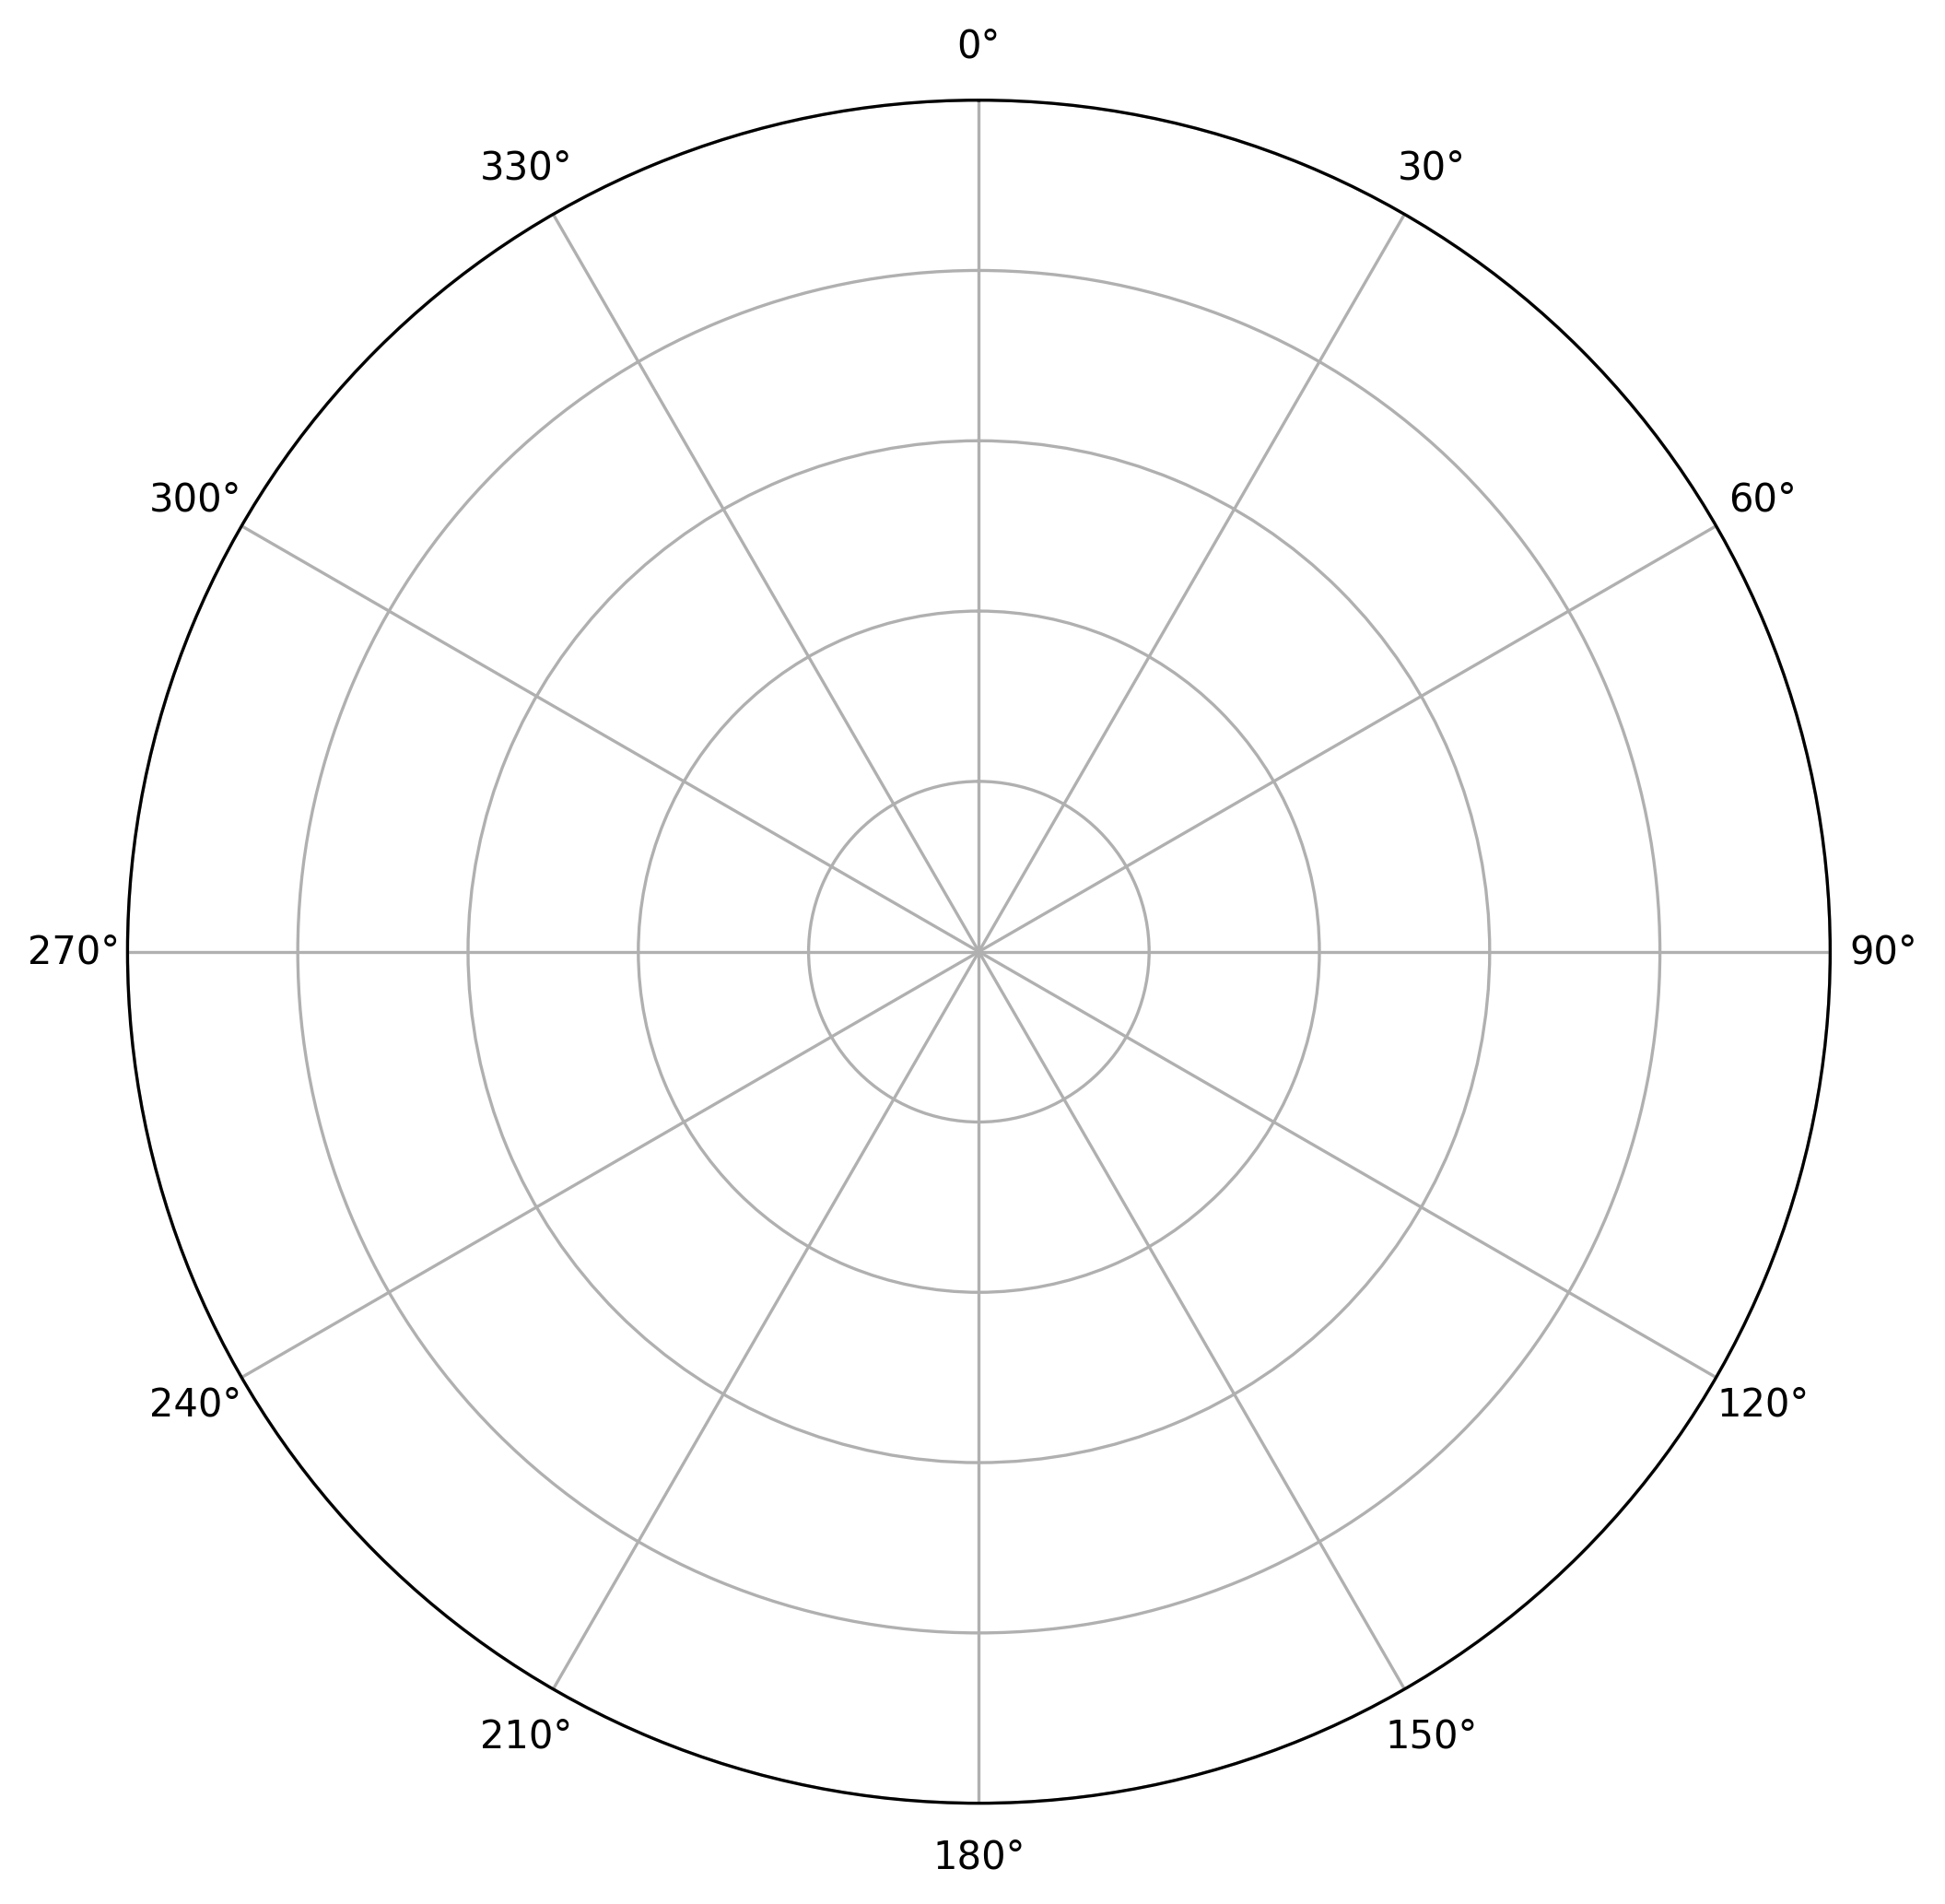

In [12]:
# 绘制空的圆形背景
plt.figure(figsize=(8,8),dpi=300)
ax = plt.subplot(111, projection='polar')

# 旋转0度到正上方
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# 关闭y轴标签
ax.set_yticklabels([])

# 设置标题和标签
# ax.set_title("North Angle Distribution")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)

plt.show()